# Survival Analysis Lab

Complete the following exercises to solidify your knowledge of survival analysis.

In [2]:
!pip install lifelines
!pip install plotly==4.14.3

     |████████████████████████████████| 349 kB 5.1 MB/s 
     |████████████████████████████████| 68 kB 5.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=2477b057c2fe4d22c3f5f0cb566b1fb48b1075288d63297bb4e1d752092537dc
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 13.2 MB 5.5 MB/s 
  Created wheel for retrying: filename=r

In [6]:
import pandas as pd
import plotly 
import cufflinks as cf
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test


cf.go_offline()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/Data_sets/attrition.csv')

In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

*Tip: If your lines have gaps in them, you can fill them in by using the `fillna(method=ffill)` and the `fillna(method=bfill)` methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab*

In [44]:
data.Gender= data.Gender.fillna(method = 'ffill')
data = data.fillna(method= 'ffill')

In [62]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1).sort_values('timeline')
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

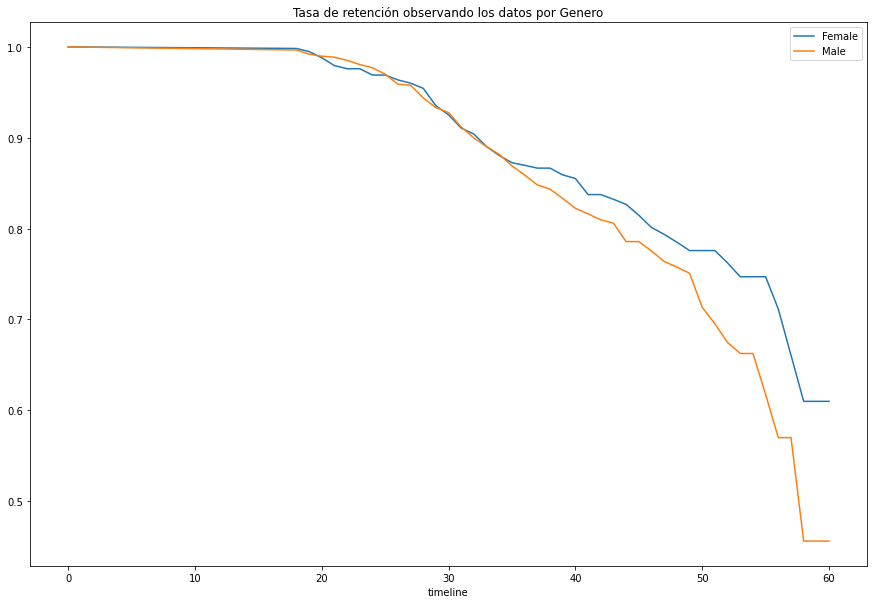

In [75]:
sur1 = survival(data, 'Gender', 'Age', 'Attrition' )
sur1.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención observando los datos por Genero')
           #labels=dict(values='Rentención (Meses)', index='Tasa de retención'))


## 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

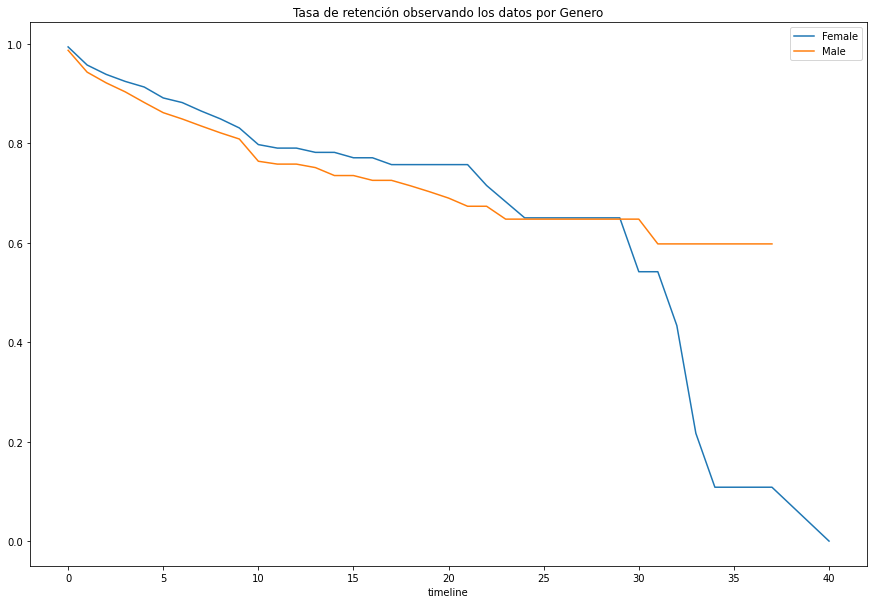

In [74]:
sur2 = survival(data,'Gender', 'YearsAtCompany', 'Attrition' )
sur2.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención observando los datos por Genero')
           #labels=dict(values='Rentención (Meses)', index='Tasa de retención'))


## 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this.

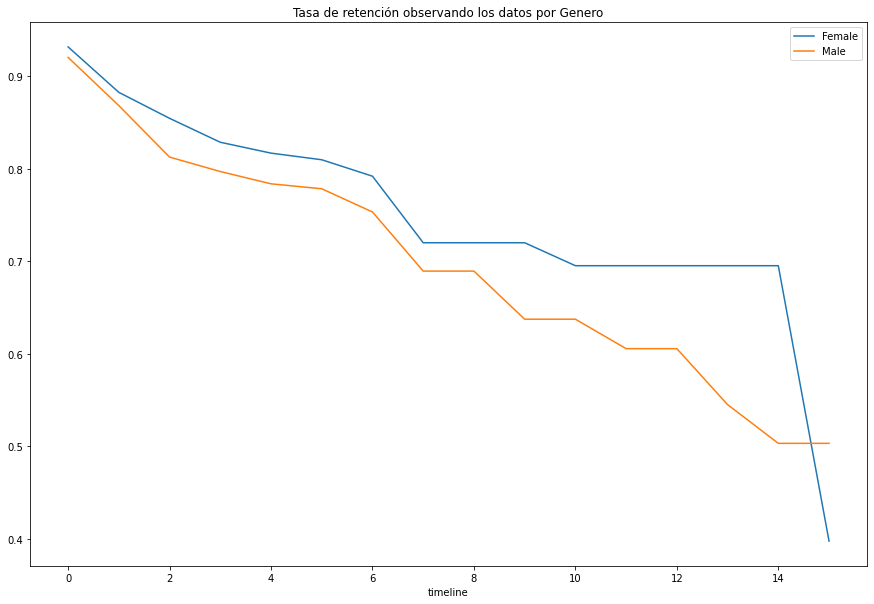

In [76]:
sur3= survival(data, 'Gender', 'YearsSinceLastPromotion', 'Attrition' )
sur3.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención observando los datos por Genero')
           #labels=dict(values='Rentención (Meses)', index='Tasa de retención'))


## 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company.

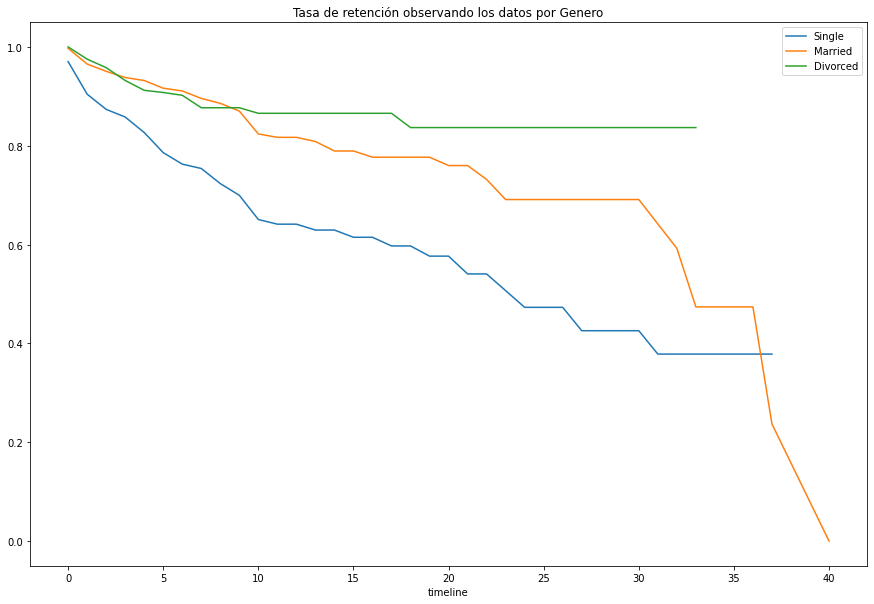

In [77]:
sur4= survival(data, 'MaritalStatus', 'YearsAtCompany', 'Attrition' )
sur4.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención observando los datos por Genero')
           #labels=dict(values='Rentención (Meses)', index='Tasa de retención'))


## 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

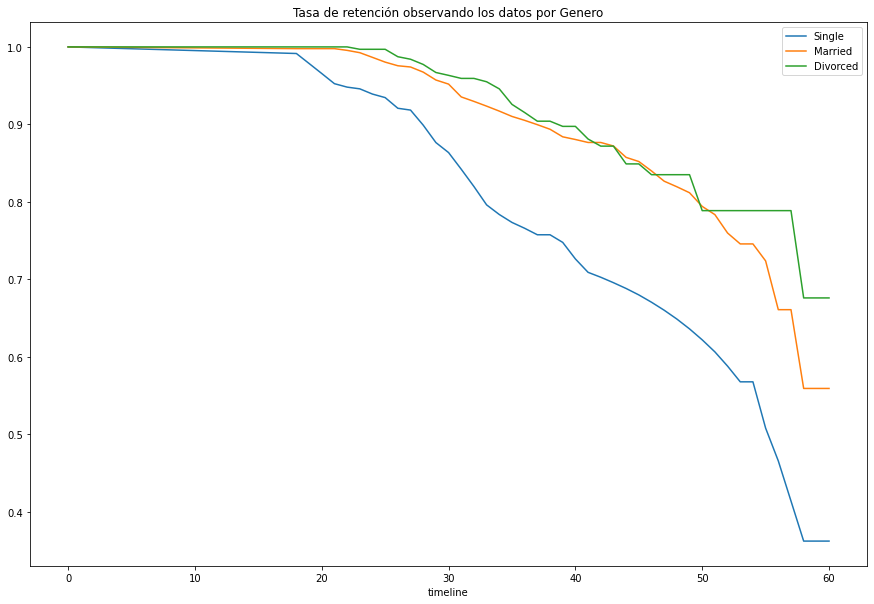

In [78]:
sur5 = survival(data, 'MaritalStatus', 'Age', 'Attrition')
sur5.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención observando los datos por Genero')
           #labels=dict(values='Rentención (Meses)', index='Tasa de retención'))


## 6. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together. 

Create a new field in the data set that concatenates marital status and gender, and then generate and plot a survival curve that shows the retention by this new field over the age of the employee.

In [ ]:
data['gender_marital']= data['MaritalStatus'] + "_"+ data['Gender']
data['gender_marital']


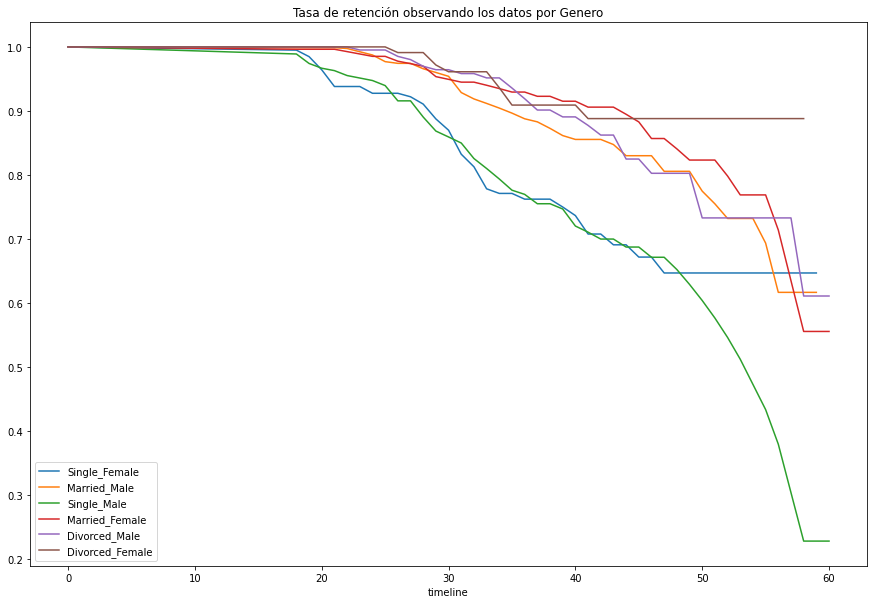

In [82]:
sur6= survival(data, 'gender_marital', 'Age', 'Attrition' )
sur6.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención observando los datos por Genero')
           #labels=dict(values='Rentención (Meses)', index='Tasa de retención'))


## 6. Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.

In [87]:
data.EnvironmentSatisfaction.unique()

array([2, 3, 4, 1])

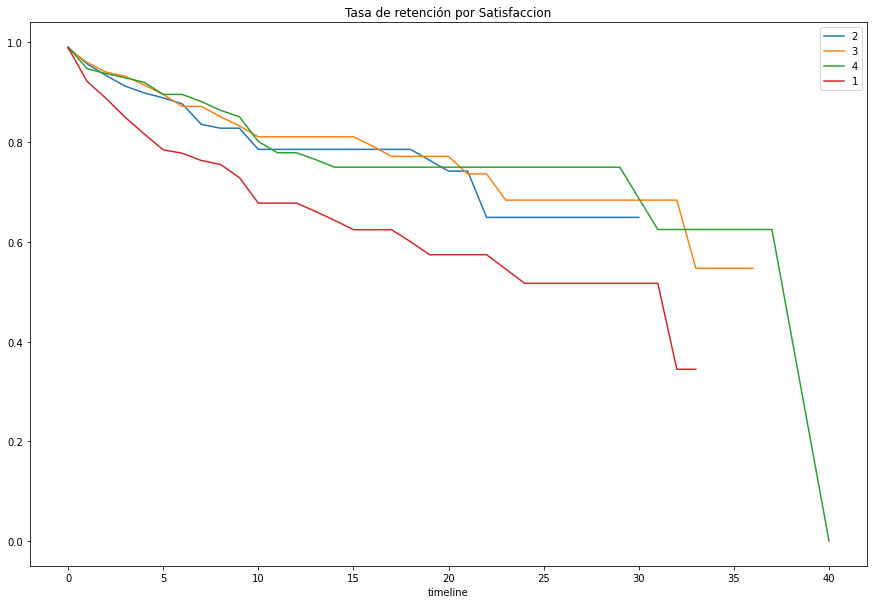

In [88]:
sur7= survival(data, 'EnvironmentSatisfaction', 'YearsAtCompany', 'Attrition' )
sur7.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención por Satisfaccion')
           

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 7. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

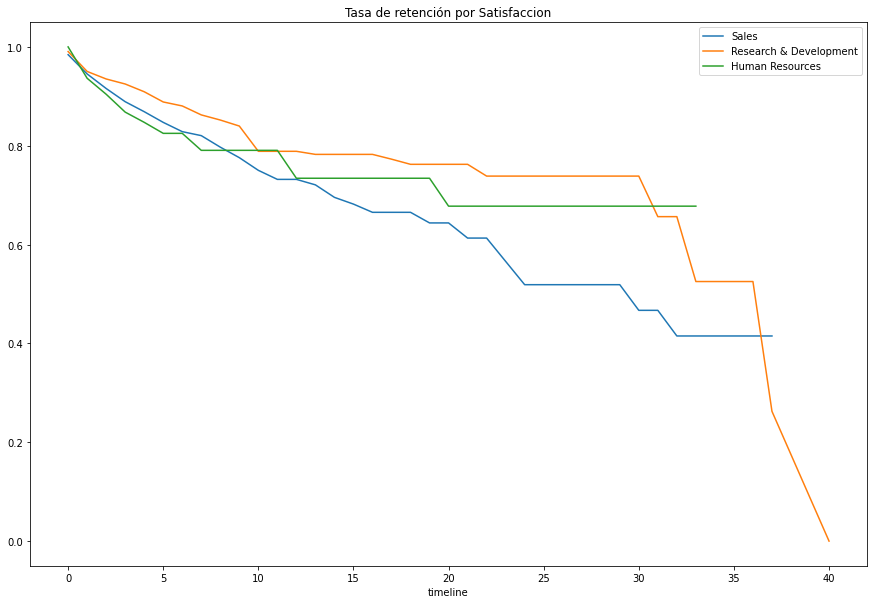

In [100]:
sur8= survival(data,'Department','YearsAtCompany' , 'Attrition' )
sur8.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención por Satisfaccion')

## 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

Filter the data set for just the sales department and then generate and plot survival curves by job role and the number of years at the company.

In [105]:
sales = data[data.Department=='Sales']
sales

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,gender_marital,HourlyRateLevel
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,Single_Female,Very High
18,53,0,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,0,31,3,3,25,8,3,7,Married_Female,High
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,0,10,4,3,5,3,0,3,Single_Male,High
27,42,0,Travel_Rarely,691,Sales,8,4,Marketing,1,35,...,1,10,2,3,9,7,4,2,Married_Male,Low
29,46,0,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,0,22,2,2,2,2,2,1,Single_Female,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,45,0,Travel_Rarely,374,Sales,20,3,Life Sciences,1,2046,...,0,8,3,3,5,3,0,1,Single_Female,Low
1461,50,1,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,1,20,3,3,3,2,2,0,Divorced_Male,Very Low
1462,39,0,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,21,2,2,20,9,9,6,Married_Female,Moderate
1464,26,0,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,0,5,2,3,4,2,0,0,Single_Female,Very Low


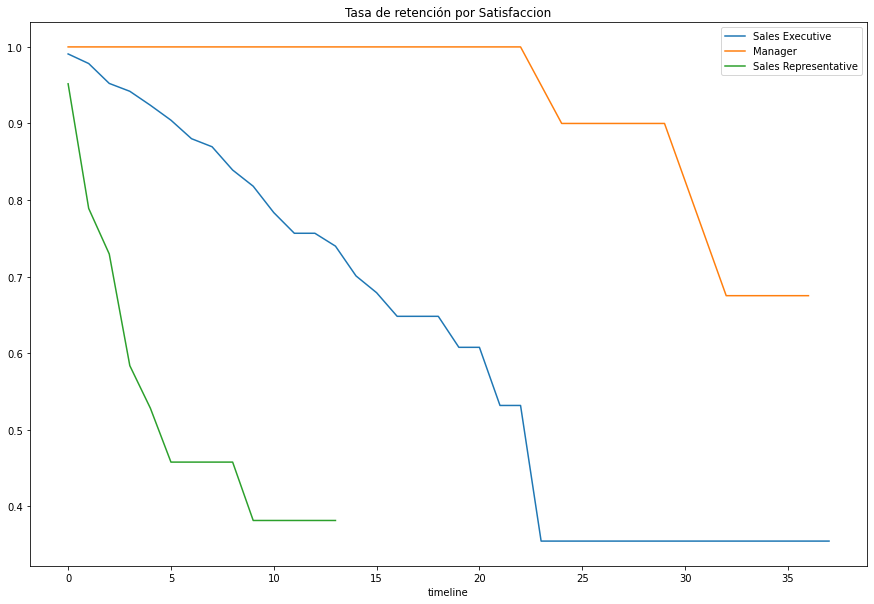

In [106]:
sur9= survival(sales,'JobRole','YearsAtCompany' , 'Attrition' )
sur9.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención por Satisfaccion')

## 9. Let examine how compensation affects attrition.

- Use the `pd.qcut` method to bin the HourlyRate field into 5 different pay grade categories (Very Low, Low, Moderate, High, and Very High).
- Generate and plot survival curves showing employee retention by pay grade and age.

In [97]:
data['HourlyRateLevel'] =pd.qcut(data['HourlyRate'], 5, ['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

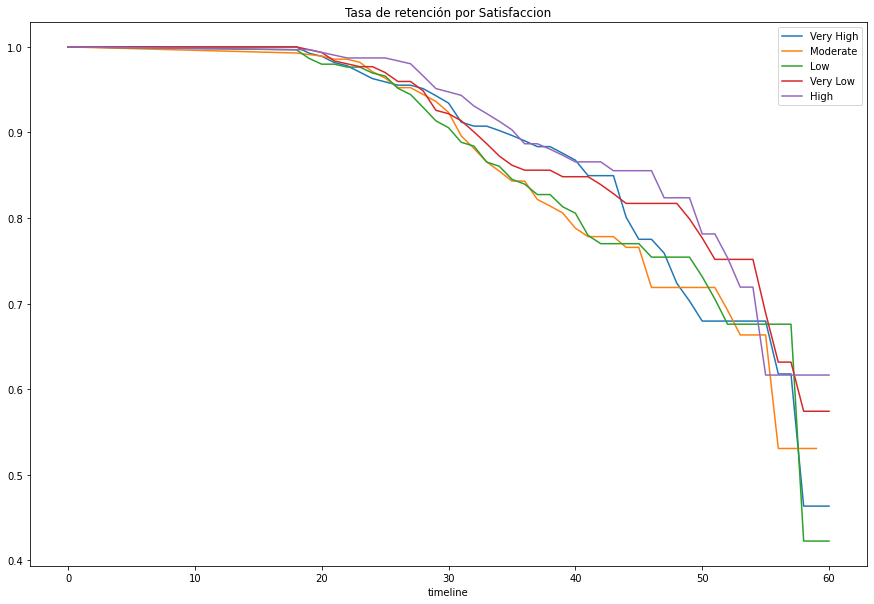

In [112]:
sur10= survival(data,'HourlyRateLevel', 'Age' , 'Attrition' )
sur10.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención por Satisfaccion')

## 10. Finally, let's take a look at how the demands of the job impact employee attrition.

- Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
- Create a new field that concatenates that field with the BusinessTravel field.
- Generate and plot survival curves showing employee retention based on these conditions and employee age.

In [115]:
import numpy as np

In [121]:
data.OverTime = np.where(data.OverTime=='Yes', 'Overtime', 'Regular Hours')
data['New']= data.OverTime + '_'+ data.Department

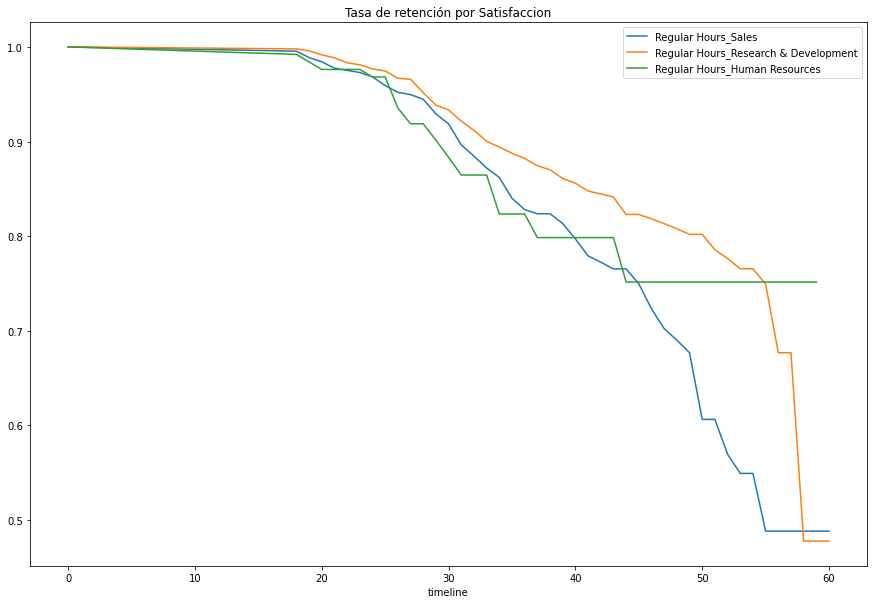

In [122]:
sur10= survival(data,'New', 'Age' , 'Attrition' )
sur10.plot(figsize= (15,10),kind='line', 
           title='Tasa de retención por Satisfaccion')